In [4]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt

Ostatnia cześć kursu Pythona będzie dotyczyć biblioteki **pandas**, która służy do analizy danych. Zacznijmy zatem od importu. Przeważnie bibliotekę skraca się do *pd*:

In [5]:
import pandas as pd

Pandas posiada dwie podstawowe struktury danych: szereg (Series) oraz ramka danych (DataFrame). Zaczniemy od szeregów. Szereg danych, mówiąc prościej jest to lista danych tego samego typu.

Żeby zobaczyć szeregi w akcji, stwórzmy listę losowych liczb:

In [44]:
losowe = np.random.randint(1, 20, 26)
print(losowe)

[11 13  6  9 18 10  7  8  5  2 15 16  6 18  7 12 17 12 13  7 17 15 14 11  9
 16]


A następnie stwórzmy szereg, korzystając z powyższych liczb:

In [8]:
dane = pd.Series(losowe)
print(dane)

0     14
1      6
2     16
3      7
4     17
5     13
6      7
7     15
8     15
9      2
10    12
11    12
12     3
13    15
14     2
15     4
16    15
17     1
18    13
19     9
20    13
21     4
22    19
23     4
24     5
dtype: int64


Czym różni się szereg od listy? Szereg danych posiada indeks, czyli klucz, dzięki ktoremu możemy zindetyfikować dane. Domyślnie, indeks jest ciągiem liczb zaczynających się od zera. Nie musi tak być, możemy podczas tworzenia przekazać również indeks:

In [12]:
dane2 = pd.Series([1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])
print(dane2)

a    1
b    2
c    3
d    4
e    5
dtype: int64


Jak można domyśleć się, indeks służy nam do uzyskania dostępu do danego elementu:

In [16]:
print(dane2['b'])

2


Więcej o dostępnie do danych będzie w dalszej części kursu.

Żeby uzyskać rozmiar danych możemy wykorzystać znaną już funkcję **len** lub wykorzystać polę **shape**. Bardzo podobnie jak było to w przypadku obiektów z biblioteczki numpy:

In [19]:
print(len(dane))
print(dane.shape)

25
(25,)


Przeważnie zbiory danych, na których pracujemy są  duże. Stąd, próba ich wyświetlenia może okazać się karkołomna
lub nawet niemożliwa. Czasem chcemy tylko zobaczyć pogląd. Do tego służą dwie metody: **head** i **tail**, które
    zwrócą nam kilka pierwszych lub ostatnich wierszy z szeregu:

In [21]:
print(dane.head())

0    14
1     6
2    16
3     7
4    17
dtype: int64


In [22]:
print(dane.tail())

20    13
21     4
22    19
23     4
24     5
dtype: int64


Szeregi są dostosowane do analizy danych. Np. udostępniają prosty sposób do uzyskania podstawowych statystyk:

In [23]:
print("Średnia:", dane.mean())
print("Mediana:", dane.median())

Średnia: 9.72
Mediana: 12.0


Jak i inne przydatne funkcje:

In [30]:
print("Zbiór wartości:", dane.unique())
print("Zliczanie", dane.value_counts())

Zbiór wartości: [14  6 16  7 17 13 15  2 12  3  4  1  9 19  5]
Zliczanie 15    4
13    3
4     3
12    2
7     2
2     2
19    1
17    1
16    1
14    1
9     1
6     1
5     1
3     1
1     1
dtype: int64


Metoda ```value_counts``` zwraca nam szereg danych, który możemy wykorzystać do dalszych badań. Na przyklad, żeby wyświetlić 5 najczęściej występujących wartości, możemy napisać:

In [32]:
print(dane.value_counts(). head())

15    4
13    3
4     3
12    2
7     2
dtype: int64


Żeby uzyskać wszystkie podstawowe statystyki, możmey wywołać metodę ```describe```:

In [33]:
print(dane.describe())

count    25.000000
mean      9.720000
std       5.556678
min       1.000000
25%       4.000000
50%      12.000000
75%      15.000000
max      19.000000
dtype: float64


A żeby wyświetlić je w postaci wykresu:

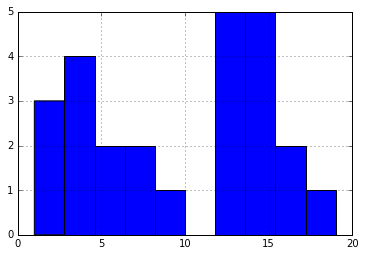

In [36]:
dane.hist()

(Dane zostały wygenerowane w sposób losowy, stąd ich analiza jak na razie jest pozbawiona sensu.)

## Indeksowanie, czyli dostęp do danych

Stwórzmy szereg danych, którego indeks będzie składać się z wielkich liter alfabetu:

In [46]:
import string
litery = list(string.ascii_uppercase)
dane3 = pd.Series(losowe, index=litery)
print(dane3.head())

A    11
B    13
C     6
D     9
E    18
dtype: int64


Najprostszym sposobem dostępu do danych jest przez indeks:

In [52]:
print(dane3['E'])

18


Szeregi udostępniają wiele więcej. Jeżeli chcemy zobaczyć przykłady o kluczach *P*, *Y*, *T*, to możemy podać listę indeksów jako argument:

In [53]:
print(dane3[['P', 'Y', 'T']])

P    12
Y     9
T     7
dtype: int64


Możemy również podać zakres danych:

In [57]:
print(dane3['B':'E'])

B    13
C     6
D     9
E    18
dtype: int64


Jeżeli zmienimy indeks szeregu, to cay czas mamy możliwość pracy na indeskach liczbowych:

In [58]:
print(dane3[2:5])

C     6
D     9
E    18
dtype: int64


## Mapowanie

Szeregi pozwalają zmieniać dane, które przechowują. Pojedyńcze wartości mozemy zmieniać przy pomocy odwołania się do konkretnego elementu:

In [62]:
dane3[2] = 777
print(dane3[2])

777


Jeżeli chcemy zmienić cały szereg przy pomocy funkcji, możemy wykorzystać metodę ```map```:

In [64]:
def cube(x):
    return x ** 3
print(dane3.map(cube))

A         1331
B         2197
C    469097433
D          729
E         5832
F         1000
G          343
H          512
I          125
J            8
K         3375
L         4096
M          216
N         5832
O          343
P         1728
Q         4913
R         1728
S         2197
T          343
U         4913
V         3375
W         2744
X         1331
Y          729
Z         4096
dtype: int64


*Uwaga:* w Pythonie istnieją funkcje lambda, które można tu wykorzystać.

## Ramki danych

Ramka danych jest odpowiednikiem tabeli znanej z R lub sqla. Patrząc z innego punktu widzenia, jest lista szeregóœ danych, które są połącząne z sobą wspólnym indeksem. Stwórzmy ramkę danych składających się z małych i wielkich liter:

In [68]:
wielkie = list(string.ascii_uppercase)
male = list(string.ascii_lowercase)
surowe = list(zip(male, wielkie))
print(surowe)

dane = pd.DataFrame(surowe)
print(dane)

[('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E'), ('f', 'F'), ('g', 'G'), ('h', 'H'), ('i', 'I'), ('j', 'J'), ('k', 'K'), ('l', 'L'), ('m', 'M'), ('n', 'N'), ('o', 'O'), ('p', 'P'), ('q', 'Q'), ('r', 'R'), ('s', 'S'), ('t', 'T'), ('u', 'U'), ('v', 'V'), ('w', 'W'), ('x', 'X'), ('y', 'Y'), ('z', 'Z')]
    0  1
0   a  A
1   b  B
2   c  C
3   d  D
4   e  E
5   f  F
6   g  G
7   h  H
8   i  I
9   j  J
10  k  K
11  l  L
12  m  M
13  n  N
14  o  O
15  p  P
16  q  Q
17  r  R
18  s  S
19  t  T
20  u  U
21  v  V
22  w  W
23  x  X
24  y  Y
25  z  Z


Jak widzimy, ramkę danych tworzymy podając listę przykładów. W powyższej ramce mamy dwie kolumny nazwane *0* i *1*. Zmieńmy te nazwy na bardziej czytelne:

In [70]:
dane.columns = ["małe", "wielkie"]
print(dane.head())

  małe wielkie
0    a       A
1    b       B
2    c       C
3    d       D
4    e       E


Obsługa ramki danych nie różni się za bardzo od obsługi szeregu, np. działaja metody head i tail, jak i inne:

In [73]:
print(dane.max())
print(dane.describe())

małe       z
wielkie    Z
dtype: object
       małe wielkie
count    26      26
unique   26      26
top       j       M
freq      1       1


Dodajmy trzecią kolumnę składającą się z losowych liczb:

In [75]:
dane['losowe'] = np.random.randint(1, 20, 26)